In [20]:

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

#Defining Functions required

In [21]:

def gen_states(n):
    states = []
    for i in range(2 ** n):
        state = format(i, f'0{n}b')  # Binary representation
        state = state.replace('0', 'R').replace('1', 'B')  # Replace 0 with 'R' and 1 with 'B'
        states.append(state)
    return states
def trans_prob(n):
    trans_probs = {}
    for state in states:
        trans_probs[state] = {}
        for neighbor in states:
            diff_count = sum(1 for i in range(len(state)) if state[i] != neighbor[i])
            if diff_count == 1:
                trans_probs[state][neighbor] = 1 / n
            else:
                trans_probs[state][neighbor] = 0
    return trans_probs
def draw_markov_chain(states, trans_probs):
    G = nx.DiGraph()
    G.add_nodes_from(states)

    for state in states:
        for neighbor, prob in trans_probs[state].items():
            if prob > 0:
                G.add_edge(state, neighbor, weight=prob)

    pos = nx.spring_layout(G)
    labels = {state: state for state in states}
    edge_labels = {(u, v): f"{p:.2f}" for u, v, p in G.edges(data='weight')}
    plt.figure(figsize=(8, 8))
    nx.draw(G, pos, with_labels=True, node_size=5000, node_color='green', labels=labels)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Markov Chain Directed Graph")
    plt.show()

def find_abs_states(states, trans_probs):
    abs_states = []
    for state in states:
        is_abs = all(trans_probs[state][neighbor] == 0 for neighbor in states if neighbor != state)
        if is_abs:
            abs_states.append(state)
    return abs_states


#markov Chain for n=3

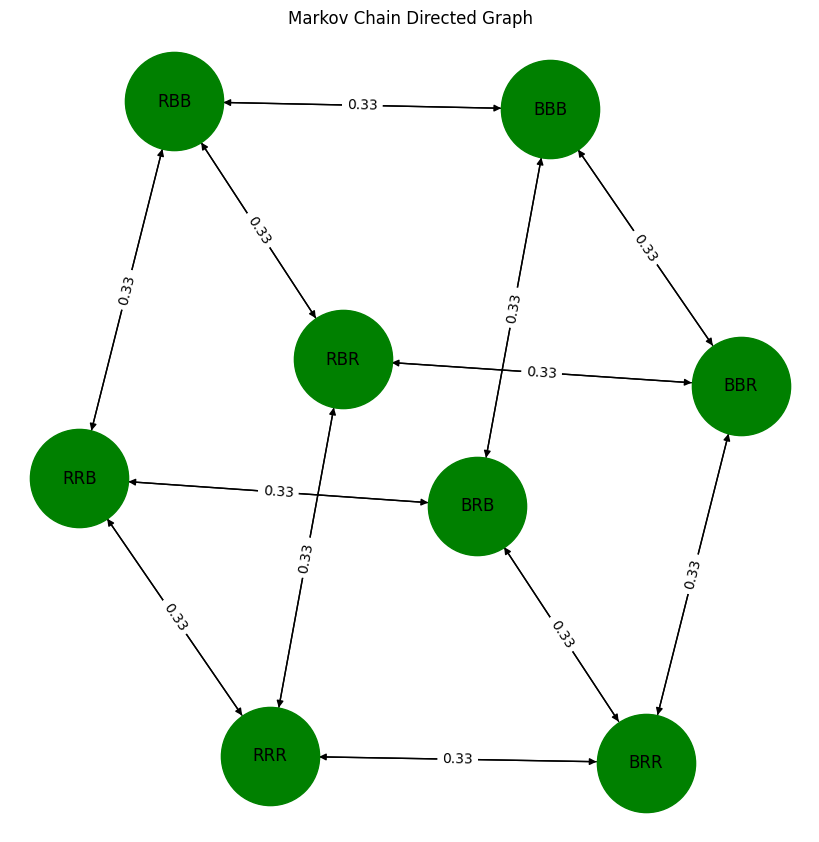

Number of states: 8
States:
RRR
RRB
RBR
RBB
BRR
BRB
BBR
BBB
Absorbing states: []
This is an absorbing Markov's Chain because it has absorbing states.


In [30]:
n=3
states = gen_states(n)
trans_probs = trans_prob(n)
draw_markov_chain(states, trans_probs)
abs_states = find_abs_states(states, trans_probs)

print(f"Number of states: {len(states)}")
print("States:")
for state in states:
    print(state)
print(f"Absorbing states: {abs_states}")
print(f"This is an absorbing Markov's Chain because it has absorbing states.")

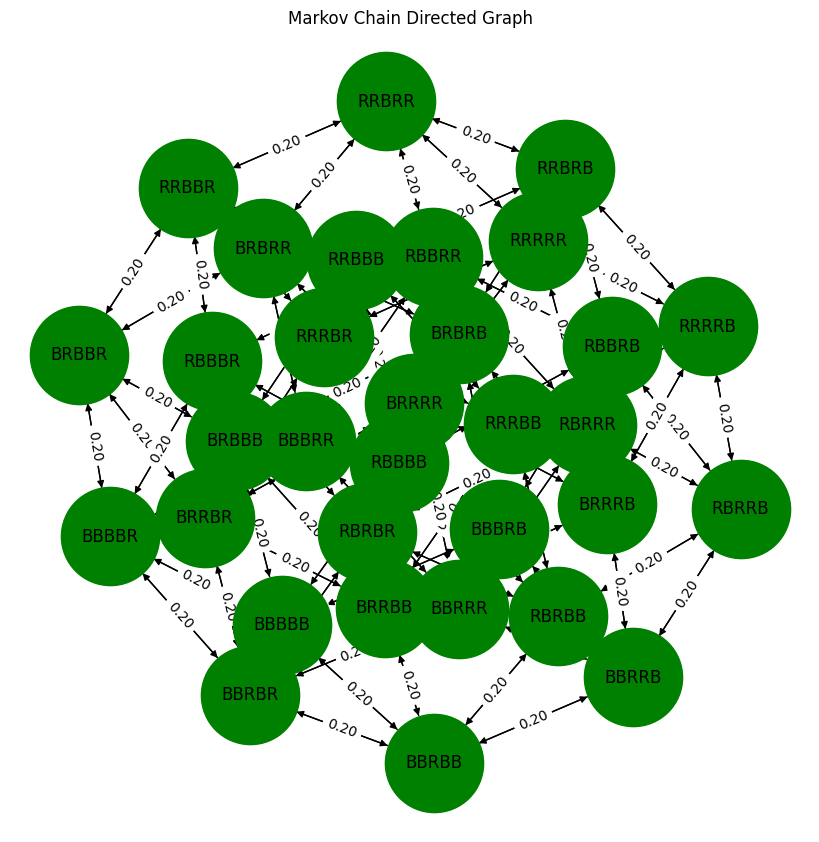

Number of states: 32
States:
RRRRR
RRRRB
RRRBR
RRRBB
RRBRR
RRBRB
RRBBR
RRBBB
RBRRR
RBRRB
RBRBR
RBRBB
RBBRR
RBBRB
RBBBR
RBBBB
BRRRR
BRRRB
BRRBR
BRRBB
BRBRR
BRBRB
BRBBR
BRBBB
BBRRR
BBRRB
BBRBR
BBRBB
BBBRR
BBBRB
BBBBR
BBBBB
Absorbing states: []
This is an absorbing Markov's Chain because it has absorbing states.


In [31]:
n=5
states = gen_states(n)
trans_probs = trans_prob(n)
draw_markov_chain(states, trans_probs)
abs_states = find_abs_states(states, trans_probs)

print(f"Number of states: {len(states)}")
print("States:")
for state in states:
    print(state)
print(f"Absorbing states: {abs_states}")
print(f"This is an absorbing Markov's Chain because it has absorbing states.")

#general case

In [23]:




def comp_abs_prob(n):
    num_states = 2**n  # Total number of states

    # Initialize arrays to store absorbing states and probabilities
    abs_states = [0, n]  # 0 blue arcs and n red arcs
    abs_prob = np.zeros(num_states, dtype=float)

    # Calculate probs for absorbing states using binomial coefficients
    for k in abs_states:
        abs_prob += np.math.comb(n, k) / num_states

    return abs_prob

# Example usage:
n = 5  # Replace with your desired value of n
probs = comp_abs_prob(n)
print(f"Number of states for n = {n}: {2**n}")
print(f"Probabilities of eventually hitting absorbing states: {probs}")

Number of states for n = 5: 32
Probabilities of eventually hitting absorbing states: [0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625 0.0625
 0.0625 0.0625]


#Toroidal Surface

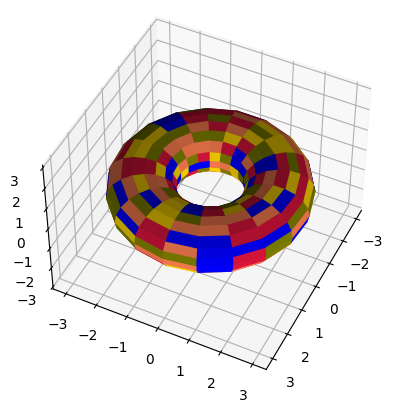

In [24]:


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate toroidal surface data (as you did in your original code)
angs = np.linspace(0, 2.*np.pi, 20)
theta, phi = np.meshgrid(angs, angs)
x = (2 + np.cos(theta)) * np.cos(phi)
y = (2 + np.cos(theta)) * np.sin(phi)
z = np.sin(theta)
rng = np.random.default_rng()
randind = rng.integers(5, size=x.shape)
colors = np.array(['crimson', 'coral', 'gold', 'blue', 'olive'])[randind]

# Plot the toroidal surface
surf = ax.plot_surface(x, y, z, facecolors=colors, linewidth=1)

# Set view angles and z-axis limits
ax.view_init(46, 26)
ax.set_zlim(-3, 3)

plt.show()


In [25]:
def simulate_toroidal_color_process(n, k, max_iterations=1000):
    # Initialize the toroidal grid with random colors
    init_state = np.random.randint(0, k, size=(n, n))

    abs_state = None
    for _ in range(max_iterations):
        # Randomly select a rectangle
        i, j = np.random.randint(0, n, size=2)

        # Randomly select one of the 8 neighbors
        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)
        ngbr_i, ngbr_j = (i + di) % n, (j + dj) % n

        # Choose the neighbor's color
        color_chosen = init_state[ngbr_i, ngbr_j]

        # Update the color of the selected rectangle
        init_state[i, j] = color_chosen

        # Check if all cells have the same color (absorbing state)
        if np.all(init_state == init_state[0, 0]):
            abs_state = init_state
            break

    return init_state, abs_state


In [26]:

# Example usage:
n = 5  # Grid size, replace with your desired value
k = 4  # Number of colors, replace with your desired value
init_state, abs_state = simulate_toroidal_color_process(n, k)

print("Initial State:")
print(init_state)
if abs_state is not None:
    print("Absorbing State:")
    print(abs_state)
else:
    print("Simulation did not reach an absorbing state within the maximum iterations.")


Initial State:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Absorbing State:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [27]:




def simulate_toroidal_color_process(n, k, max_iterations=1000, init_state=None):
    # Initialize the toroidal grid with random colors
    if init_state is None:
        init_state = np.random.randint(0, k, size=(n, n))

    states = [init_state.copy()]
    abs_state = None

    for _ in range(max_iterations):
        # Randomly select a rectangle
        i, j = np.random.randint(0, n, size=2)

        # Randomly select one of its 8 neighbors
        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)
        ngbr_i, ngbr_j = (i + di) % n, (j + dj) % n

        # Choose the neighbor's color
        color_chosen = init_state[ngbr_i, ngbr_j]

        # Update the color of the selected rectangle
        init_state[i, j] = color_chosen

        states.append(init_state.copy())

        # Check if all cells have the same color (absorbing state)
        if np.all(init_state == init_state[0, 0]):
            abs_state = init_state
            break

    return states, abs_state

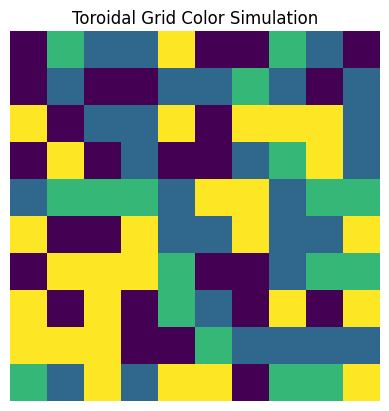

In [28]:


def animate_simulation(n, k, max_iterations=1000):
    init_state = np.random.randint(0, k, size=(n, n))
    states, abs_state = simulate_toroidal_color_process(n, k, max_iterations, init_state)
    num_frames = len(states)

    # Create the figure and axis
    fig, ax = plt.subplots()
    img = ax.imshow(states[0], cmap='viridis')

    def update(frame):
        img.set_array(states[frame])
        return img,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=range(num_frames), repeat=False)

    plt.axis('off')
    plt.title("Toroidal Grid Color Simulation")

    return anim  # Return the animation object

# Set parameters and run the animation
n = 10
k = 4
max_iterations = 5000  # Adjust as needed
anim = animate_simulation(n, k, max_iterations)

plt.show()  # Display the animation
